In [165]:
#ÂºïÂÖ•Ê®°ÁµÑ
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import seaborn as sns
from math import sqrt

In [166]:
#ËÆÄÊ™î
test_x = pd.read_csv('df1_test1.csv')
test_y = pd.read_csv('df1_test1y.csv')
train = pd.read_csv('df1_train.csv')

In [167]:
#Â∞áË®ìÁ∑¥Ë≥áÊñôÂàáÂàÜ
train_y = pd.DataFrame(train['life_post_consumer'])
train_x = train.drop('life_post_consumer',axis =1)

In [168]:
ymean = np.mean(train_y) #Ë®àÁÆóË®ìÁ∑¥ÈõÜÁöÑymean
standardized_all_train_x = (train_x - np.mean(train_x,axis = 0))/np.std(train_x) #Â∞ç train dataÊâÄÊúâfeatureÂÅöÊ®ôÊ∫ñÂåñÔºàÈÄ£Á∫åÂíå‰∫åÂÖÉÈÉΩÊúâÔºâ
standardized_all_test_x = (test_x - np.mean(train_x,axis = 0))/np.std(train_x) #Â∞ç test dataÊâÄÊúâfeatureÂÅöÊ®ôÊ∫ñÂåñÔºàÈÄ£Á∫åÂíå‰∫åÂÖÉÈÉΩÊúâÔºâ
demeaned_y_train = train_y - ymean # Â∞çË®ìÁ∑¥ÈõÜÁöÑ yÂÅöde-meanËôïÁêÜ
demeaned_y_test = test_y - ymean # Â∞çÊ∏¨Ë©¶ÈõÜÁöÑ yÂÅöde-meanËôïÁêÜ

In [169]:
#Âè™Â∞çÈÄ£Á∫åËÆäÊï∏ÂÅöÊ®ôÊ∫ñÂåñ
standardized_cont_train_x = pd.DataFrame()
standardized_cont_test_x = pd.DataFrame()

for i in train_x.columns:
    mean = np.mean(train_x[i])
    std = np.std(train_x[i])
    if  mean > 1: #Âõ† binaryÁöÑÂπ≥Âùá‰∏çÂèØËÉΩÈ´òÈÅé 1ÔºåÊïÖÁî®Âπ≥ÂùáÂÄº‰ΩúÁÇ∫ÁØ©ÈÅ∏ÊòØÂê¶ÈÄ≤Ë°åÊ®ôÊ∫ñÂåñÊ¢ù‰ª∂
        standardized_cont_train_x[i] = (train_x[i] - mean)/std
        standardized_cont_test_x[i] = (test_x[i]-mean)/std #Ê∏õÂéª train_x ÁöÑÂπ≥ÂùáÂÄº
    else:
        standardized_cont_train_x[i] = train_x[i]
        standardized_cont_test_x[i] = test_x[i]   

In [170]:
lr = LinearRegression() #ÂëºÂè´ OLS 
def RMSE(ypred,y_test): #Ë®àÁÆóRMSE
    rmse = sqrt(sum((ypred - y_test)**2)/len(ypred))
    return rmse

**Q1.Conduct exploratory analysis on this dataset. You should at least provide summary statistics and visualizations of the key variables. Moreover, you should discuss the characteristics of this dataset.**

ÂèØ‰ª•ÁôºÁèæÊ≠§Ë≥áÊñôÈõÜ‰∏≠ÁöÑÈÄ£Á∫åËÆäÊï∏Âè™Êúâ8ÁµÑÔºåÂåÖÂê´È†êÊ∏¨ÂÄºyÂú®ÂÖßÔºåÂÖ∂‰ªñËÆäÊï∏ÁöÜÁÇ∫‰∫åÂÖÉËÆäÊï∏

In [171]:
# Â∞çË≥áÊñôÈõÜÂÅöÊïòËø∞Áµ±Ë®à
train.describe()

life_post_consumer  comp_page_like        Paid  life_post_reach  \
count          400.000000      400.000000  400.000000       400.000000   
mean           810.340000   122890.625000    0.260000     13436.855000   
std            899.037251    16280.121461    0.439184     20454.614675   
min             17.000000    81370.000000    0.000000       238.000000   
25%            335.000000   112676.000000    0.000000      3282.500000   
50%            554.500000   128816.000000    0.000000      5150.000000   
75%            955.500000   136393.000000    1.000000     13232.000000   
max          11328.000000   139441.000000    1.000000    139008.000000   

       life_post_impression_liked  life_post_reach_liked     comment  \
count                4.000000e+02             400.000000  400.000000   
mean                 1.747735e+04            6585.952500    6.855000   
std                  6.614514e+04            7599.228501   14.402519   
min                  5.670000e+02             236.000000    0.000000   
25%                  3.962500e+03            2171.000000    1.000000   
50%                  6.214500e+03            3391.000000    3.000000   
75%                  1.510450e+04            8011.000000    7.000000   
max                  1.107833e+06           48368.000000  146.000000   

             like       share   type_link  ...       hour5       hour6  \
count   400.00000  400.000000  400.000000  ...  400.000000  400.000000   
mean    169.07250   25.485000    0.037500  ...    0.022500    0.030000   
std     243.14837   25.946248    0.190221  ...    0.148489    0.170801   
min       0.00000    0.000000    0.000000  ...    0.000000    0.000000   
25%      55.75000   10.000000    0.000000  ...    0.000000    0.000000   
50%      98.00000   18.500000    0.000000  ...    0.000000    0.000000   
75%     187.25000   32.000000    0.000000  ...    0.000000    0.000000   
max    1998.00000  208.000000    1.000000  ...    1.000000    1.000000   

            hour7       hour8       hour9      hour10      hour11      hour12  \
count  400.000000  400.000000  400.000000  400.000000  400.000000  400.000000   
mean     0.032500    0.022500    0.062500    0.150000    0.092500    0.055000   
std      0.177546    0.148489    0.242365    0.357519    0.290093    0.228266   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

           hour13     hour14  
count  400.000000  400.00000  
mean     0.102500    0.02500  
std      0.303685    0.15632  
min      0.000000    0.00000  
25%      0.000000    0.00000  
50%      0.000000    0.00000  
75%      0.000000    0.00000  
max      1.000000    1.00000  

[8 rows x 44 columns]

Â§öÊï∏Á≤âÁµ≤Â∞àÈ†ÅÊåâËÆö‰∫∫Êï∏ËêΩÂú®130000Â§ö‰∫∫‰∏äÔºå‰ΩøÂæóÂàÜÂ∏ÉÂΩ¢ÊàêÂ∑¶ÂÅèÂΩ¢ÁãÄÔºå‰ΩÜÂÖ∂‰ªñÁöÑÈÄ£Á∫åËÆäÊï∏ÈÉΩÊòØÂè≥ÂÅèÂàÜ‰ΩàÔºåÈ°ØÁ§∫Âá∫ÊåâËÆöÁ¥õÁµ≤Â∞àÈ†ÅÁöÑ‰∫∫Êï∏Â§öÔºå‰ΩÜÊúÉÈóúÊ≥®ÂÖ∂Ë≤ºÊñáÁöÑ‰∫∫ËºÉÂ∞ë

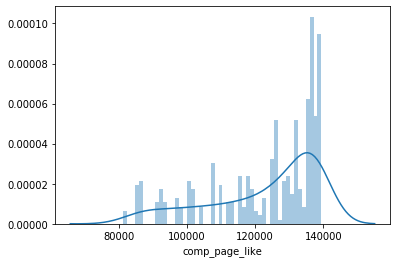

In [221]:
sns.distplot(train['comp_page_like'],50)

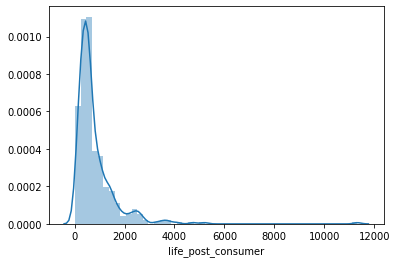

In [230]:
sns.distplot(train['life_post_consumer'],50)

„ÄåÁïôË®ÄÊï∏„Äç„ÄÅ„ÄåÂè™ÊåâÈÅé‰∏ÄÂÄãËÆö„ÄçÂàÜ‰ΩàÊõ¥ÂØÜÈõÜÈõÜ‰∏≠Âú®0ÈôÑËøëÔºåÂΩ¢ÊàêÂÅèÂ≥∞ÂçÅÂàÜÂêëÂ∑¶ÁöÑÂè≥ÂÅèÂàÜ‰ΩàÔºåÂ¶Ç‰∏ãÂÖ©ÂºµÂúñ

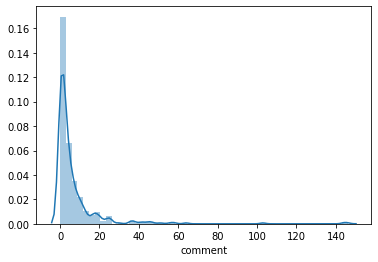

In [224]:
sns.distplot(train['comment'],50)

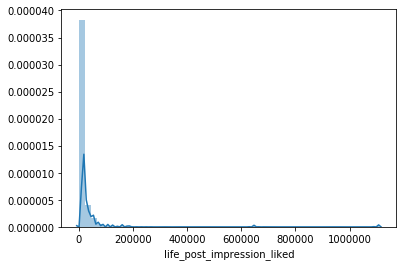

In [227]:
sns.distplot(train['life_post_impression_liked'],50)

„ÄåËß∏Âèä‰∫∫Êï∏„Äç„ÄÅÊåâËÆöÊï∏„ÄÅÂàÜ‰∫´Êï∏‰πüÈÉΩÊòØÂÅèÂ≥∞ÂêëÂ∑¶ÁöÑÂàÜ‰ΩàÔºå‰ΩÜËºÉ‰∏çÂØÜÈõÜÂú®0‰∏ä

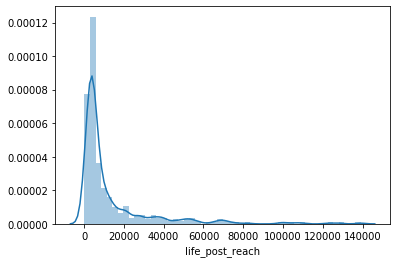

In [228]:
sns.distplot(train['life_post_reach'],50)

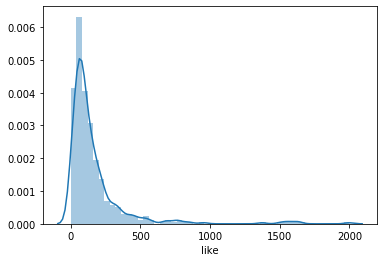

In [229]:
sns.distplot(train['like'],50)

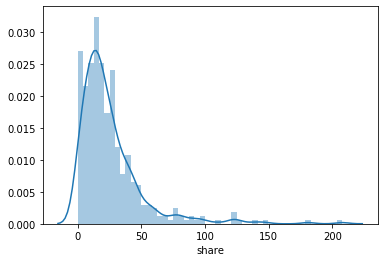

In [235]:
sns.distplot(train['share'],50)

**Q2.Construct a prediction model using the setting of Case 1. What is the test RMSE? What are the predictions and true outcome values for the first 20 data points in the testing data?**

In [242]:
#ÁÇ∫Ë®òÈåÑÊØèÂÄãcaseÁöÑË°®Áèæ‰∏¶Ë£ΩÂúñÔºåÂÖàÂÅöÂá∫Ê®ôË®ò
Case = ['Case1','Case2A','Case2B','Case2C','Case3A','Case3B','Case3C','Case3D','Case4' ]
Best_RMSE =[ ] #Â≠ò‰∏ãÊØèÂÄãcase‰∏≠ÊúÄÂ•ΩÁöÑrmse
#Á¥îÁ≤πÁî®ymeanÈÄ≤Ë°åÈ†êÊ∏¨
mse = 0
y_mean= [ ]
for i in range(50):
    mse += (ymean - test_y.iloc[i][0])**2
    y_mean.append(ymean[0])
mse = mse/50    
rmse = sqrt(mse)
y_mean = np.array(y_mean)
Best_RMSE.append(rmse)
print('RMSE:',rmse)
outcome_1 = pd.DataFrame(y_mean,columns=['Prediction'])
outcome_1['True Value'] = test_y['life_post_consumer']
outcome_1[:20]

RMSE: 928.809510933216


Prediction  True Value
0       810.34        1183
1       810.34         189
2       810.34        2327
3       810.34          76
4       810.34         354
5       810.34         713
6       810.34         204
7       810.34         288
8       810.34         555
9       810.34         586
10      810.34         446
11      810.34         884
12      810.34         524
13      810.34         672
14      810.34          23
15      810.34         570
16      810.34        1361
17      810.34        5934
18      810.34        2319
19      810.34        1633

**Q3.Construct a prediction model using the setting of Case 2A. What is the test RMSE? What is the predictions and the true outcome values for the first 20 data points in the testing data?**

In [178]:
#Áî® OLS È†êÊ∏¨ 2AÁöÑÊÉÖÊ≥Å
lr.fit(train_x,train_y)
A_2 = lr.predict(test_x)
rmse = RMSE(A_2,np.array(test_y))
Best_RMSE.append(rmse)
print('RMSE:',rmse)
outcome_2A = pd.DataFrame(A_2,columns=['Prediction'])
outcome_2A['True Value'] = test_y['life_post_consumer']
outcome_2A[:20]

RMSE: 692.2891271362009


Prediction  True Value
0    781.579915        1183
1    315.920431         189
2   2279.084852        2327
3   -136.342864          76
4    302.356241         354
5    462.424024         713
6    321.677708         204
7    504.522448         288
8    505.895471         555
9    488.367006         586
10   392.614235         446
11   388.918467         884
12   804.875275         524
13   634.323644         672
14   176.317656          23
15   645.729138         570
16  1983.538589        1361
17  3144.397100        5934
18  4060.610712        2319
19  4288.223081        1633

**Q4.Construct a prediction model using the setting of Case 2B. What is the test RMSE? What is the predictions and the true outcome values for the first 20 data points in the testing data?**

In [189]:
#Áî® OLS È†êÊ∏¨ 2BÁöÑÊÉÖÊ≥Å
lr.fit(train_x,demeaned_y_train)
B_2 = lr.predict(test_x)
rmse = RMSE(B_2,np.array(demeaned_y_test))
Best_RMSE.append(rmse)
print('RMSE:',rmse)
outcome_2B = pd.DataFrame(B_2,columns=['Prediction'])
outcome_2B['Prediction'] = outcome_2B['Prediction']+ ymean[0]
outcome_2B['True Value'] = test_y['life_post_consumer']
outcome_2B[:20]

RMSE: 692.289127136183


Prediction  True Value
0    781.579915        1183
1    315.920431         189
2   2279.084852        2327
3   -136.342864          76
4    302.356241         354
5    462.424024         713
6    321.677708         204
7    504.522448         288
8    505.895471         555
9    488.367006         586
10   392.614235         446
11   388.918467         884
12   804.875275         524
13   634.323644         672
14   176.317656          23
15   645.729138         570
16  1983.538589        1361
17  3144.397100        5934
18  4060.610712        2319
19  4288.223081        1633

**Q5.Construct a prediction model using the setting of Case 2C. What is the test RMSE? What is the predictions and the true outcome values for the first 20 data points in the testing data?**

In [191]:
#Áî® OLS È†êÊ∏¨ 2CÁöÑÊÉÖÊ≥Å
lr.fit(standardized_all_train_x,demeaned_y_train)
C_2 = lr.predict(standardized_all_test_x)
rmse = RMSE(C_2,np.array(demeaned_y_test))
Best_RMSE.append(rmse)
print('RMSE:',rmse)
outcome_2C = pd.DataFrame(C_2,columns=['Prediction'])
outcome_2C['Prediction'] = outcome_2C['Prediction']+ ymean[0]
outcome_2C['True Value'] = test_y['life_post_consumer']
outcome_2C[:20]

RMSE: 692.2891271371996


Prediction  True Value
0    781.579915        1183
1    315.920431         189
2   2279.084852        2327
3   -136.342864          76
4    302.356241         354
5    462.424024         713
6    321.677708         204
7    504.522448         288
8    505.895471         555
9    488.367006         586
10   392.614235         446
11   388.918467         884
12   804.875275         524
13   634.323644         672
14   176.317656          23
15   645.729138         570
16  1983.538589        1361
17  3144.397100        5934
18  4060.610712        2319
19  4288.223081        1633

Case 2 ÁöÑÁµêÊûúÁ´üÁÑ∂ÂÖ®ÈÉ®ÈÉΩÁõ∏Âêå„ÄÇËÄÉÊÖÆÁ∑öÊÄßÊ®°ÂûãÁöÑÁâπÂæµÔºåÂ∞çÊñºÊ∏¨Ë©¶ÂíåË®ìÁ∑¥ÈõÜÁöÑÂâçËôïÁêÜÔºå‰∏çË´ñÊòØÂ∞çxÈÄ≤Ë°åÊ®ôÊ∫ñÂåñËàáÂê¶ÔºõÊàñÊòØÂ∞çyÂü∑Ë°åde-meanÔºåÈÉΩ‰∏çÊúÉÂΩ±ÈüøÊ®°ÂûãÁöÑÈ†êÊ∏¨ÊïàÊûú„ÄÇ

**Q6.Construct a prediction model using the setting of Case 3A. You should consider at least the following values for the regularization coefficient (ùõº): 0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000. Plot the test RMSE with respect to ùõº. What is the best test RMSE? What is the predictions and the true outcome values for the first 20 data points in the testing data using the best ùõº?**

Best Alpha: 10.0
Best RMSE: 660.5612900111672


Prediction  True Value
0   1068.333624        1183
1    229.755319         189
2   2008.558892        2327
3   -102.874899          76
4    541.457699         354
5    606.459258         713
6    414.982798         204
7    602.810514         288
8    500.184385         555
9    492.306636         586
10   508.376500         446
11   409.130022         884
12   730.467680         524
13   561.060328         672
14   294.450897          23
15   602.482867         570
16  1632.182715        1361
17  2698.882818        5934
18  3841.631528        2319
19  3892.400909        1633

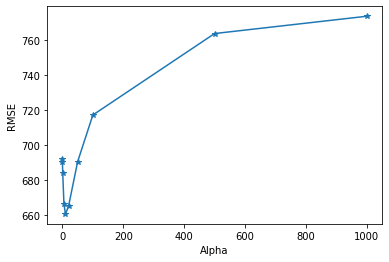

In [213]:
def ridge(x_train,y_train,x_test,y_test): #ÂëºÂè´ Ridge‰∏¶Âü∑Ë°åÂ§öÂÄã alphaÂÄº
    alpha = [0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000]
    fig,ax = plt.subplots() 
    Rmse =[ ]
    #Ë®àÁÆóÊØè‰∏ÄÂÄã alpha‰∏ãÁöÑÈ†êÊ∏¨ÊïàÊûú
    for i in alpha: 
        rr = Ridge(alpha = i) 
        rr.fit(x_train, y_train) 
        ypred = rr.predict(x_test)
        rmse = RMSE(ypred,np.array(y_test))
        Rmse.append(rmse) # Â≠ò‰∏ãÊØè‰∏ÄÁ≠Ü rmse
    index = [ i == min(Rmse) for i in Rmse] #ÊâæÂá∫rmseÁöÑÊúÄ‰ΩéÂÄºÔºåÂÅöÁÇ∫Ê®°Âûã‰∏≠ÊúÄ‰Ω≥ÁöÑ alpha
    best_a = np.array(alpha)[index]
    print('Best Alpha:',best_a[0])
    print('Best RMSE:',min(Rmse))
    Best_RMSE.append(min(Rmse))
    ax.plot(alpha,Rmse,'*-')
    ax.set_xlabel('Alpha')
    ax.set_ylabel('RMSE')
    #ÂèñÂá∫ÊúÄ‰Ω≥ÂÄºËº∏Âá∫
    best_rr = Ridge(alpha = best_a)
    best_rr.fit(x_train,y_train)
    best_pred = best_rr.predict(x_test)
    outcome = pd.DataFrame(best_pred,columns=['Prediction'])
    if int(y_train.iloc[0][0]) == -287: #Â¶ÇÊûúÊï∏ÊìöÊòØdemean_yÔºåË®òÂæóÂä†ÂõûÂπ≥Âùá
        outcome['Prediction'] = outcome['Prediction']+ ymean[0]
    outcome['True Value'] = test_y['life_post_consumer']
    return outcome[:20]
ridge(train_x,train_y,test_x,test_y)

**Q7.Construct a prediction model using the setting of Case 3B. You should consider at least the following values for the regularization coefficient (ùõº): 0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000. Plot the test RMSE with respect to ùõº. What is the best test RMSE? What is the predictions and the true outcome values for the first 20 data points in the testing data using the best ùõº?**

In [246]:
standardized_cont_train_x

comp_page_like  Paid  life_post_reach  life_post_impression_liked  \
0          0.167369     0        -0.522485                   -0.211290   
1          0.787796     0        -0.473877                   -0.189856   
2          0.868978     1        -0.591308                   -0.231953   
3          0.922669     1         1.171820                    0.069974   
4          0.658274     0        -0.569183                   -0.226095   
..              ...   ...              ...                         ...   
395       -0.921516     0        -0.442843                   -0.194821   
396        0.199903     0         0.365125                    0.034220   
397        0.217308     0         0.239030                    0.122712   
398        0.412637     1         1.316712                    0.155817   
399       -0.315295     0        -0.503835                   -0.210276   

     life_post_reach_liked   comment      like     share  type_link  \
0                -0.587894 -0.476554 -0.440910 -0.597558          0   
1                -0.530975  0.635754 -0.214428  0.174232          0   
2                -0.720178 -0.476554 -0.696218 -0.983453          0   
3                 0.565771  0.913831  0.996225  1.872169          0   
4                -0.678675 -0.337516 -0.432674 -0.713327          0   
..                     ...       ...       ...       ...        ...   
395              -0.490657 -0.407035 -0.436792  0.019874          0   
396               0.931529  6.683928  1.235061  0.290000          0   
397               1.098070  2.026139 -0.292667 -0.443200          0   
398               1.088583 -0.198477 -0.267960 -0.597558          0   
399              -0.584732 -0.407035 -0.457382 -0.481790          0   

     type_status  ...  hour5  hour6  hour7  hour8  hour9  hour10  hour11  \
0              0  ...      0      0      0      0      0       0       0   
1              0  ...      0      0      0      0      0       0       1   
2              0  ...      0      0      0      0      1       0       0   
3              0  ...      0      0      0      0      0       0       0   
4              0  ...      0      0      0      1      0       0       0   
..           ...  ...    ...    ...    ...    ...    ...     ...     ...   
395            0  ...      0      0      0      0      0       1       0   
396            0  ...      0      0      0      0      0       0       0   
397            1  ...      0      0      0      0      0       0       0   
398            0  ...      0      0      0      0      0       0       0   
399            0  ...      0      0      0      0      0       0       0   

     hour12  hour13  hour14  
0         0       0       0  
1         0       0       0  
2         0       0       0  
3         0       0       0  
4         0       0       0  
..      ...     ...     ...  
395       0       0       0  
396       1       0       0  
397       0       1       0  
398       0       1       0  
399       0       1       0  

[400 rows x 43 columns]

Best Alpha: 20.0
Best RMSE: 645.5168123938738


Prediction  True Value
0   1142.269542        1183
1    254.157015         189
2   1834.024889        2327
3     15.718169          76
4    599.763663         354
5    635.940390         713
6    427.856444         204
7    603.662060         288
8    514.523788         555
9    580.001060         586
10   544.341760         446
11   477.184421         884
12   801.545545         524
13   557.452872         672
14   396.278865          23
15   615.151524         570
16  1474.674174        1361
17  2504.864373        5934
18  3524.859645        2319
19  3438.403437        1633

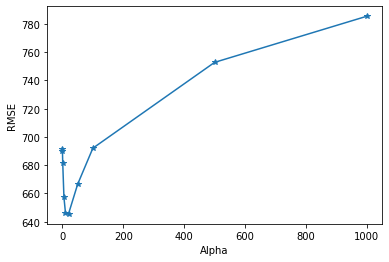

In [214]:
ridge(standardized_cont_train_x,demeaned_y_train,standardized_cont_test_x,demeaned_y_test)

**Q8.Construct a prediction model using the setting of Case 3C. You should consider at least the following values for the regularization coefficient (ùõº): 0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000. Plot the test RMSE with respect to ùõº. What is the best test RMSE? What is the predictions and the true outcome values for the first 20 data points in the testing data using the best ùõº?**

Best Alpha: 10.0
Best RMSE: 660.5612900111671


Prediction  True Value
0   1068.333624        1183
1    229.755319         189
2   2008.558892        2327
3   -102.874899          76
4    541.457699         354
5    606.459258         713
6    414.982798         204
7    602.810514         288
8    500.184385         555
9    492.306636         586
10   508.376500         446
11   409.130022         884
12   730.467680         524
13   561.060328         672
14   294.450897          23
15   602.482867         570
16  1632.182715        1361
17  2698.882818        5934
18  3841.631528        2319
19  3892.400909        1633

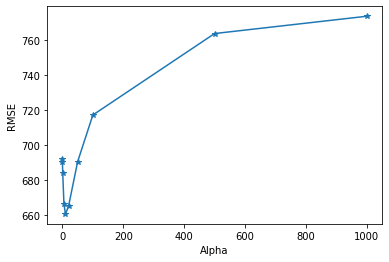

In [215]:
ridge(train_x,demeaned_y_train,test_x,demeaned_y_test)

**Q9.Construct a prediction model using the setting of Case 3D. You should consider at least the following values for the regularization coefficient (ùõº): 0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000. Plot the test RMSE with respect to ùõº. What is the best test RMSE? What is the predictions and the true outcome values for the first 20 data points in the testing data using the best ùõº?**

Best Alpha: 100.0
Best RMSE: 588.793465752767


Prediction  True Value
0   1040.500123        1183
1    278.465050         189
2   1997.724464        2327
3    -21.140365          76
4    554.215257         354
5    602.840642         713
6    337.523470         204
7    599.435785         288
8    470.293704         555
9    500.724140         586
10   511.148619         446
11   387.743553         884
12   700.089577         524
13   532.222810         672
14   255.183118          23
15   653.356378         570
16  1728.169192        1361
17  2775.002711        5934
18  3174.792252        2319
19  3141.857976        1633

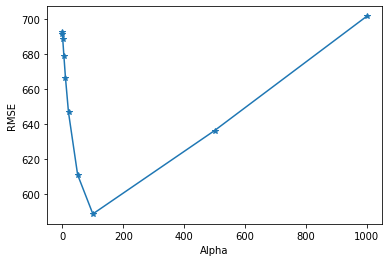

In [216]:
ridge(standardized_all_train_x,demeaned_y_train,standardized_all_test_x,demeaned_y_test)

ÁôºÁèæÂú®Case3‰∏≠ÔºåAÂíåCÁöÑÈ†êÊ∏¨ÂÄºÁõ∏ÂêåÔºåÂà§Êñ∑Â∞çyÈÄ≤Ë°åDe-meanËôïÁêÜÂú®Ê®°Âûã‰∏≠ÊòØÊ≤íÊúâÂπ´Âä©ÁöÑÔºõËÄåÂÖ∂‰∏≠RmseÊúÄ‰ΩéÁöÑÊòØDÔºåÊ®°ÂûãÁ´üÁÑ∂Âú®Â∞ç‰∫åÂÖÉËÆäÊï∏ÂÅöÊ®ôÊ∫ñÂåñ‰πãÂæåÁöÑÈ†êÊ∏¨ËÉΩÂäõ‰∏äÂçáÔºå‰ΩÜalphaÂÄº‰æÜÂà∞100ÔºåÊØîËµ∑ÂÖ∂‰ªñÊÉÖÊ≥ÅÈ´òÂá∫Ë®±Â§ö

**Q10.Construct a prediction model using the setting of Case 4. You should consider at least the following values for the regularization coefficient (ùõº): 0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000. Plot the test RMSE with respect to ùõº. What is the best test RMSE? What is the predictions and the true outcome values for the first 20 data points in the testing data using the best ùõº?**

Best Alpha: 10.0
Best RMSE: 643.3838482161635


/Users/chenjingmin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 47975917.14864497, tolerance: 32249.892376
  positive)
/Users/chenjingmin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4456630.675997615, tolerance: 32249.892376
  positive)


Prediction  True Value
0   1241.598585        1183
1    287.888761         189
2   2119.906747        2327
3    -16.297183          76
4    449.101151         354
5    711.145591         713
6    398.059174         204
7    460.151242         288
8    645.442998         555
9    591.436454         586
10   429.966193         446
11   461.483152         884
12   899.809288         524
13   571.866406         672
14   352.865220          23
15   548.085325         570
16  1741.015111        1361
17  2712.054392        5934
18  3681.459427        2319
19  3645.114033        1633

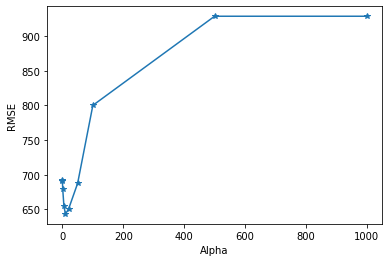

In [219]:
def lasso(x_train,y_train,x_test,y_test): #ÂëºÂè´ Lasso‰∏¶Âü∑Ë°åÂ§öÂÄã alphaÂÄº
    alpha = [0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000]
    fig,ax = plt.subplots()
    Rmse =[ ]
    for i in alpha:
        lasso_pred =[ ]
        ls = Lasso(alpha = i) 
        ls.fit(x_train, y_train) 
        ypred = ls.predict(x_test) #Ëº∏Âá∫ÊúÉÊòØ‰∏ÄÁ∂≠ÁöÑÂàóË°®
        for i in ypred: #Â∞áÈ†êÊ∏¨ÂÄºËÆäÊàêÈô£ÂàóÂΩ¢Âºè
            lasso_pred.append([i])
        rmse = RMSE(np.array(lasso_pred),np.array(y_test))
        Rmse.append(rmse)
    index = [ i == min(Rmse) for i in Rmse]
    best_a = np.array(alpha)[index]
    print('Best Alpha:',best_a[0])
    print('Best RMSE:',min(Rmse))
    Best_RMSE.append(min(Rmse))
    ax.plot(alpha,Rmse,'*-')
    ax.set_xlabel('Alpha')
    ax.set_ylabel('RMSE')
    
    best =[ ]
    best_ls = Lasso(alpha = best_a)
    best_ls.fit(x_train,y_train)
    best_pred = best_ls.predict(x_test)
    outcome = pd.DataFrame(best_pred,columns=['Prediction'])
    outcome['Prediction'] = outcome['Prediction']+ ymean[0]
    outcome['True Value'] = test_y['life_post_consumer']
    return outcome[:20]
lasso(standardized_cont_train_x,demeaned_y_train,standardized_cont_test_x,demeaned_y_test)

Case 4Ëàá3BÁöÑÈ†êÊ∏¨ËÉΩÂäõÁõ∏Âéª‰∏çÈÅ†Ôºå‰ΩÜÂú®alphaÂæàÂ§ßÁöÑÊôÇÂÄôÔºàÂ§ßÊñº100‰πãÂæåÔºâÔºåÈ†êÊ∏¨ËÉΩÂäõÂ§ßÂπÖË°∞Ê∏õ

**Q11.Summarize the best RMSE of all cases and discuss your findings. How should we preprocess the features?**

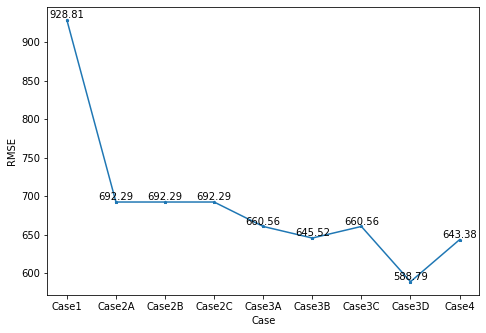

In [220]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.plot(Case,Best_RMSE,'*-',markersize = 3)
plt.ylabel('RMSE')
plt.xlabel('Case')
for a, b in zip(Case, Best_RMSE):
    plt.text(a, b, '%.2f'%b, ha='center', va='bottom', fontsize=10)


ÁµêË´ñÔºöÁôºÁèæÂú®ÊâÄÊúâÁ∑öÊÄßÊ®°Âûã‰πã‰∏≠ÔºåÂ∞çYÂÅöDe-meanÊòØÊØ´ÁÑ°ÊÑèÁæ©ÁöÑ„ÄÇÁÑ∂ËÄåÂêåÊôÇ‰πüÂèØ‰ª•ËßÄÂØüÂá∫ÔºåÂú®ÊâÄÊúâCase‰∏≠ÁöÑÂâçËôïÁêÜÔºåÈ†êÊ∏¨ËÉΩÂäõÊúÄÂ•ΩÁöÑÊòØCase3DÔºå‰ΩÜÂÖ∂ÂêåÊôÇ‰πüÊòØÊá≤ÁΩ∞È†ÖÊúÄÂ§ßÁöÑÂâçËôïÁêÜÊ≥ï„ÄÇÂà§Êñ∑ÊòØÂõ†ÁÇ∫Â∞ç‰∫åÂÖÉËÆäÊï∏ÂÅöÊ®ôÊ∫ñÂåñÔºåÊúÉÊ∏õÂ∞ëËÆäÊï∏‰πãÈñìÁöÑË∑ùÈõ¢ÔºåÂú®È†êÊ∏¨‰∏äÁöÑÊïàÊûúÊîπÈÄ≤‰∫õË®±„ÄÇÊâÄ‰ª•Âú®ÂâçËôïÁêÜ‰πã‰∏≠ÔºåÊàëÂÄë‰πüË®±Ë©≤Â∞çÊâÄÊúâÁöÑËÆäÊï∏Ôºà‰∏çË´ñÊòØÂê¶ÁÇ∫ÈÄ£Á∫åËÆäÊï∏ÔºâÂÖàÂÅöÊ®ôÊ∫ñÂåñËôïÁêÜÔºåÂèØ‰ª•ÂæóÂà∞ËºÉÂ•ΩÁî®ÁöÑÈ†êÊ∏¨Ê®°Âûã„ÄÇ